# Sherlock Holmes Adventures Preprocessing

# Section 1: Importing Required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=72acc9e198a7fff0069f1c239e981ad3fc2f6988124a4265635ef4cf0c7c82f6
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

In [4]:
import os
import random
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from transformers import T5Tokenizer, T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import Dataset
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import os

def analyse_folder_structure(folder_path):
    # Analyses the structure of the folder and displays basic information about its contents.
    try:
        files = os.listdir(folder_path)
        print(f"Total number of files in the folder: {len(files)}")

        for idx, file_name in enumerate(files):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                file_size = os.path.getsize(file_path) / 1024  # Size in KB
                print(f"{idx + 1}. {file_name} - {file_size:.2f} KB")
            else:
                print(f"{idx + 1}. {file_name} - Not a file")

        return files
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return []

# Foldr path
sherlock_folder_path = "/content/drive/My Drive/Sherlock Holmes Stories/sherlock"

# Analyse folder structure
files = analyse_folder_structure(sherlock_folder_path)

# Output the list of files for further use
print("\nList of files:", files)


Total number of files in the folder: 67
1. abbe.txt - 52.13 KB
2. chas.txt - 39.53 KB
3. cano.txt - 3777.56 KB
4. 3gar.txt - 35.97 KB
5. bosc.txt - 54.94 KB
6. blac.txt - 46.95 KB
7. case.txt - 475.40 KB
8. bery.txt - 54.61 KB
9. advs.txt - 596.60 KB
10. 3gab.txt - 35.16 KB
11. 3stu.txt - 37.90 KB
12. card.txt - 49.05 KB
13. blue.txt - 45.26 KB
14. bruc.txt - 63.46 KB
15. blan.txt - 44.32 KB
16. devi.txt - 58.91 KB
17. five.txt - 42.41 KB
18. fina.txt - 41.67 KB
19. illu.txt - 56.16 KB
20. dyin.txt - 33.93 KB
21. houn.txt - 338.32 KB
22. danc.txt - 55.97 KB
23. glor.txt - 44.44 KB
24. lady.txt - 45.19 KB
25. gold.txt - 51.82 KB
26. gree.txt - 41.50 KB
27. croo.txt - 41.24 KB
28. engr.txt - 47.82 KB
29. iden.txt - 40.72 KB
30. copp.txt - 56.71 KB
31. empt.txt - 50.57 KB
32. cnus.txt - 3302.76 KB
33. cree.txt - 45.36 KB
34. musg.txt - 43.69 KB
35. seco.txt - 57.02 KB
36. reti.txt - 32.65 KB
37. nobl.txt - 47.42 KB
38. lstb.txt - 392.91 KB
39. silv.txt - 56.23 KB
40. sign.txt - 245.95 KB


In [6]:
def display_random_files(folder_path, files, num_samples=3):
    # Displays the content of a few randomly selected files from the folder.

    # Ensuring we do not requesting more samples than available
    num_samples = min(num_samples, len(files))
    sampled_files = random.sample(files, num_samples)

    for file_name in sampled_files:
        file_path = os.path.join(folder_path, file_name)
        print(f"\n--- Displaying content of: {file_name} ---\n")
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read(500)  # Display the first 500 characters
            print(content)
            print("\n--- End of content ---\n")

# Displaying random files
display_random_files(sherlock_folder_path, files)


--- Displaying content of: iden.txt ---





                               A CASE OF IDENTITY

                               Arthur Conan Doyle



     "My dear fellow," said Sherlock Holmes as we sat on either side of
     the fire in his lodgings at Baker Street, "life is infinitely
     stranger than anything which the mind of man could invent. We would
     not dare to conceive the things which are really mere commonplaces of
     existence. If we could fly out of that window hand in hand, hover
     over this great city, gently 

--- End of content ---


--- Displaying content of: redh.txt ---





                              THE RED-HEADED LEAGUE

                               Arthur Conan Doyle



     I had called upon my friend, Mr. Sherlock Holmes, one day in the
     autumn of last year and found him in deep conversation with a very
     stout, florid-faced, elderly gentleman with fiery red hair. With an
     apology for my intrusion, I was about to withdraw when Holme

In [7]:
# Defineing the path to the Sherlock Holmes dataset in Google Drive
sherlock_folder_path = "/content/drive/My Drive/Sherlock Holmes Stories/sherlock"
cleaned_folder_path = "/content/drive/My Drive/Sherlock Holmes Stories/cleaned_sherlock"

def preprocess_text(raw_text):
    """
    Preprocesses raw text by removing unnecessary characters, headers, and extra spaces.
    """
    # Removing multiple newlines
    clean_text = re.sub(r'\n+', '\n', raw_text)

    # Removing headers (lines at the start of files, such as titles and author names)
    clean_text = re.sub(r'^.*?(ADVENTURE OF|Arthur Conan Doyle)', '', clean_text, flags=re.IGNORECASE | re.DOTALL)

    # Removing non-alphanumeric characters (excluding spaces)
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', clean_text)

    # Removing extra spaces
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()

    return clean_text

def preprocess_and_save_files(folder_path, output_folder):
    """
    Preprocess all files in the folder and save the cleaned text to a new folder.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                raw_text = file.read()

            cleaned_text = preprocess_text(raw_text)

            # Saving the cleaned text to a new file
            output_path = os.path.join(output_folder, file_name)
            with open(output_path, 'w', encoding='utf-8') as output_file:
                output_file.write(cleaned_text)

    print(f"Preprocessing complete. Cleaned files saved to '{output_folder}'.")

# Runing the preprocessing function
preprocess_and_save_files(sherlock_folder_path, cleaned_folder_path)

Preprocessing complete. Cleaned files saved to '/content/drive/My Drive/Sherlock Holmes Stories/cleaned_sherlock'.


In [8]:
def display_original_and_cleaned_samples(original_folder, cleaned_folder, num_samples=3):
    """
    Displays original and cleaned text samples for comparison.
    """
    original_files = os.listdir(original_folder)
    cleaned_files = os.listdir(cleaned_folder)

    print(f"Comparing {num_samples} random samples from the datasets...\n")

    for i in range(min(num_samples, len(original_files))):
        original_file = original_files[i]
        cleaned_file = cleaned_files[i]

        original_path = os.path.join(original_folder, original_file)
        cleaned_path = os.path.join(cleaned_folder, cleaned_file)

        # Loading original and cleaned text
        with open(original_path, 'r', encoding='utf-8') as orig_file:
            original_text = orig_file.read()

        with open(cleaned_path, 'r', encoding='utf-8') as clean_file:
            cleaned_text = clean_file.read()

        # Displaying samples
        print(f"--- Sample {i + 1}: {original_file} ---\n")
        print("Original Text (first 300 characters):")
        print(original_text[:300] + "...\n")
        print("Cleaned Text (first 300 characters):")
        print(cleaned_text[:300] + "...\n")
        print("-" * 50 + "\n")

# Displaying original and cleaned samples
display_original_and_cleaned_samples(sherlock_folder_path, cleaned_folder_path)

Comparing 3 random samples from the datasets...

--- Sample 1: abbe.txt ---

Original Text (first 300 characters):




                        THE ADVENTURE OF THE ABBEY GRANGE

                               Arthur Conan Doyle



     It was on a bitterly cold and frosty morning during the winter of '97
     that I was awakened by a tugging at my shoulder. It was Holmes. The
     candle in his hand shone upon h...

Cleaned Text (first 300 characters):
THE ABBEY GRANGE Arthur Conan Doyle It was on a bitterly cold and frosty morning during the winter of 97 that I was awakened by a tugging at my shoulder It was Holmes The candle in his hand shone upon his eager stooping face and told me at a glance that something was amiss Come Watson come he cried ...

--------------------------------------------------

--- Sample 2: chas.txt ---

Original Text (first 300 characters):




                   THE ADVENTURE OF CHARLES AUGUSTUS MILVERTON

                               Arthur Conan Doyle




In [9]:
def analyse_word_count(folder_path):
    """
    Analyses the word count in each file within the folder and displays basic statistics.
    """
    word_counts = {}
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                word_count = len(text.split())  # Split text into words and count
                word_counts[file_name] = word_count

    # Displaying statistics
    print("\n--- Word Count Analysis ---")
    total_words = sum(word_counts.values())
    avg_words = total_words / len(word_counts)
    max_words = max(word_counts.values())
    min_words = min(word_counts.values())
    print(f"Total Words: {total_words}")
    print(f"Average Words per File: {avg_words:.2f}")
    print(f"Max Words in a File: {max_words}")
    print(f"Min Words in a File: {min_words}")
    print("\nFile-wise Word Counts:")
    for file_name, count in word_counts.items():
        print(f"{file_name}: {count} words")

    return word_counts

# Analyse word count in cleaned files
word_counts = analyse_word_count(cleaned_folder_path)


--- Word Count Analysis ---
Total Words: 2347445
Average Words per File: 35036.49
Max Words in a File: 657343
Min Words in a File: 4543

File-wise Word Counts:
abbe.txt: 9227 words
chas.txt: 6785 words
cano.txt: 657343 words
3gar.txt: 6261 words
blac.txt: 8183 words
bosc.txt: 9694 words
bery.txt: 9759 words
case.txt: 82640 words
advs.txt: 104513 words
3gab.txt: 6124 words
3stu.txt: 6542 words
card.txt: 8717 words
blue.txt: 7891 words
bruc.txt: 10754 words
blan.txt: 7785 words
devi.txt: 10054 words
five.txt: 7392 words
fina.txt: 7229 words
illu.txt: 9811 words
danc.txt: 9796 words
dyin.txt: 5855 words
houn.txt: 59242 words
glor.txt: 7913 words
lady.txt: 7745 words
gold.txt: 9031 words
gree.txt: 7076 words
croo.txt: 7206 words
engr.txt: 8366 words
iden.txt: 7049 words
copp.txt: 10024 words
empt.txt: 8775 words
cnus.txt: 574776 words
cree.txt: 7732 words
seco.txt: 9707 words
musg.txt: 7648 words
reti.txt: 5583 words
nobl.txt: 8186 words
lstb.txt: 67761 words
silv.txt: 9652 words
redh.txt

In [10]:
# Path inside Google Drive
cleaned_folder_path = "/content/drive/My Drive/Sherlock Holmes Stories/cleaned_sherlock"

# Loading text files
texts = {}
for file_name in os.listdir(cleaned_folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(cleaned_folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            texts[file_name] = file.read()

# Creating input-summary pairs
inputs = []
summaries = []
for content in texts.values():
    if len(content) > 1200:  # Ensuring sufficient text length
        inputs.append(content[:1000])  # First 1000 characters as input
        summaries.append(f"start {content[1000:1200]} end")  # Next 200 characters as summary

# Tokeniser parameters
max_vocab_size = 20000
max_input_length = 1000
max_summary_length = 150

print(f"Prepared {len(inputs)} input-summary pairs.")

Prepared 67 input-summary pairs.


In [11]:
# Tokenisation of input texts
input_tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
input_tokenizer.fit_on_texts(inputs)

# Tokenisation of summaries
summary_tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
summary_tokenizer.fit_on_texts(summaries)

# Convert texts into numerical sequences
input_sequences = input_tokenizer.texts_to_sequences(inputs)
summary_sequences = summary_tokenizer.texts_to_sequences(summaries)

# Padding sequences to ensure uniform input size
input_padded = pad_sequences(input_sequences, maxlen=max_input_length, padding='post')
summary_padded = pad_sequences(summary_sequences, maxlen=max_summary_length, padding='post')

# Display tokenisation examples
print("Sample tokenised inputs and summaries:")
for i in range(min(3, len(inputs))):  # Ensuring we do not exceed available samples
    print(f"Input {i+1}: {inputs[i][:100]}...\n")
    print(f"Tokenised Input {i+1}: {input_sequences[i][:20]}...\n")
    print(f"Summary {i+1}: {summaries[i]}\n")
    print(f"Tokenised Summary {i+1}: {summary_sequences[i][:20]}...\n")


Sample tokenised inputs and summaries:
Input 1: THE ABBEY GRANGE Arthur Conan Doyle It was on a bitterly cold and frosty morning during the winter o...

Tokenised Input 1: [2, 448, 449, 44, 45, 46, 13, 9, 39, 7, 1073, 330, 4, 656, 96, 123, 2, 1074, 3, 1075]...

Summary 1: start and read it aloud Abbey Grange Marsham Kent 330 am My dear Mr Holmes I should be very glad of your immediate assistance in what promises to be a most remarkable case It is something quite in your line end

Tokenised Summary 1: [6, 5, 106, 11, 256, 107, 108, 257, 258, 259, 77, 20, 260, 50, 30, 7, 51, 25, 64, 261]...

Input 2: CHARLES AUGUSTUS MILVERTON Arthur Conan Doyle It is years since the incidents of which I speak took ...

Tokenised Input 2: [257, 258, 259, 44, 45, 46, 13, 21, 74, 145, 2, 674, 3, 12, 6, 672, 211, 260, 4, 110]...

Summary 2: start ho is he I asked The worst man in London Holmes answered as he sat down and stretched his legs before the fire Is anything on the back of the card I turned it over

In [12]:
# Model hyperparameters
embedding_dim = 128  # Dimension of the word embedding vectors
lstm_units = 256  # Number of LSTM units in both encoder and decoder

# Encoder (Processes the input text)
encoder_inputs = Input(shape=(max_input_length,))  # Input layer with a fixed sequence length
encoder_embedding = Embedding(max_vocab_size, embedding_dim)(encoder_inputs)  # Converting tokens into dense vectors
encoder_lstm, state_h, state_c = LSTM(lstm_units, return_state=True)(encoder_embedding)  # LSTM layer returning final states
encoder_states = [state_h, state_c]  # Context vector to be passed to the decoder

# Decoder (Generates the summary)
decoder_inputs = Input(shape=(None,))  # Decoder input can have variable sequence length
decoder_embedding = Embedding(max_vocab_size, embedding_dim)(decoder_inputs)  # Converting tokens into dense vectors
decoder_lstm, _, _ = LSTM(lstm_units, return_sequences=True, return_state=True)(
    decoder_embedding, initial_state=encoder_states
)  # Decoder LSTM processes embeddings and initialised with encoder states
decoder_dense = Dense(max_vocab_size, activation='softmax')  # Fully connected output layer with softmax activation
decoder_outputs = decoder_dense(decoder_lstm)  # Produces probability distribution over vocabulary

# Defining the model architecture using Encoder-Decoder structure
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compiling the model using Adam optimiser with a specified learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Splitting the dataset into training and test sets
train_inputs, test_inputs, train_summaries, test_summaries = train_test_split(
    input_padded,  # Tokenised and padded input texts
    summary_padded,  # Tokenised and padded summaries
    test_size=0.2,  # 20% of the dataset is used for testing
    random_state=42  # Ensures reproducibility
)

# Displaing the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1000)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1000, 128)      │      2,560,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 128)      │      2,560,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 256), (None,   │        394,240 │ embedding[0][0]        │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 256),    │        394,240 │ embedding_1[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 20000)    │      5,140,000 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 11,048,480 (42.15 MB)

 Trainable params: 11,048,480 (42.15 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Preparing decoder inputs (excluding the last token) and targets (excluding the first token)
train_summary_inputs = train_summaries[:, :-1]  # Removing the last token for decoder input
train_summary_targets = train_summaries[:, 1:]  # Removing the first token for decoder target

# Same preparation for test data
test_summary_inputs = test_summaries[:, :-1]
test_summary_targets = test_summaries[:, 1:]

In [14]:
# Training Parameters
batch_size = 32  # Number of samples per training batch
epochs = 20  # Number of complete passes through the dataset

# Training the Model
history = model.fit(
    [train_inputs, train_summary_inputs],  # Encoder and decoder inputs
    train_summary_targets,  # Target summaries (shifted for prediction)
    validation_data=([test_inputs, test_summary_inputs], test_summary_targets),  # Validation set
    batch_size=batch_size,
    epochs=epochs  # Number of training iterations
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 661ms/step - accuracy: 0.1948 - loss: 9.8973 - val_accuracy: 0.7454 - val_loss: 9.8029
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7398 - loss: 9.7641 - val_accuracy: 0.7450 - val_loss: 9.3723
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7389 - loss: 9.2796 - val_accuracy: 0.7440 - val_loss: 8.6100
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.7375 - loss: 8.5061 - val_accuracy: 0.7435 - val_loss: 7.7784
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7369 - loss: 7.6511 - val_accuracy: 0.7435 - val_loss: 6.8355
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7367 - loss: 6.6580 - val_accuracy: 0.7435 - val_loss: 5.8050
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.7363 - loss: 5.5854 - val_accuracy: 0.7435 - val_loss: 4.8418
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.7378 - loss: 4.5881 - val_accuracy: 0.7435 - val_loss:

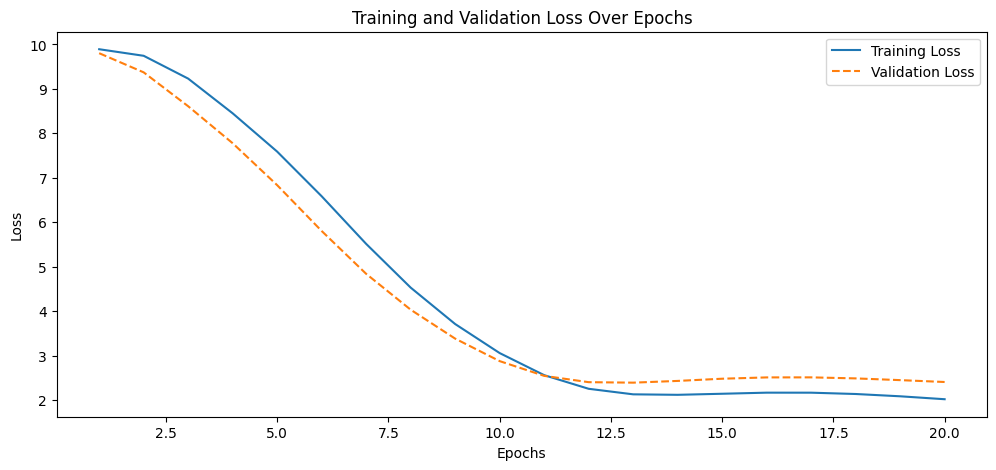

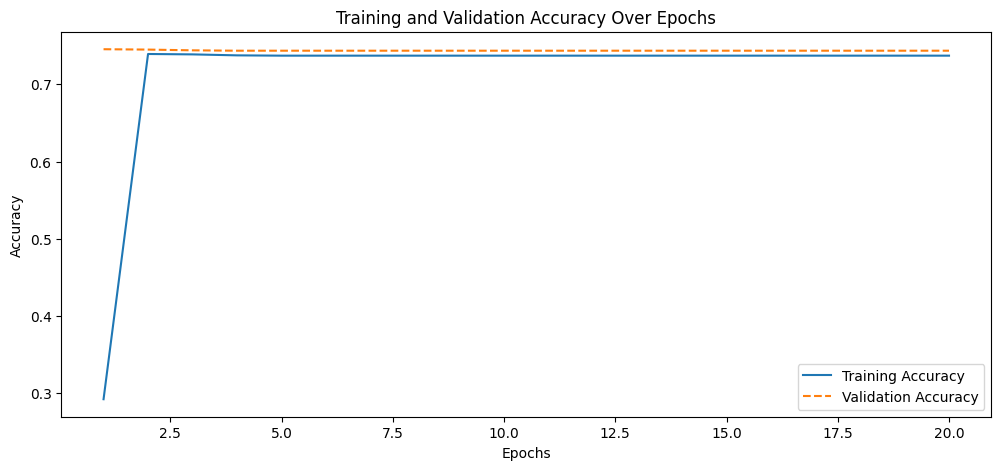

In [15]:
# Extract loss and accuracy from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs_range = range(1, len(loss) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

In [16]:
import numpy as np

def generate_summary(input_text, encoder_model, decoder_model, input_tokenizer, summary_tokenizer, max_input_length, max_summary_length):
    """
    Generates a summary for the given input text using an encoder-decoder model.
    """

    # Converting input text into tokenized sequence
    input_sequence = input_tokenizer.texts_to_sequences([input_text])

    # Pading the sequence to ensure it has a fixed length
    input_sequence = pad_sequences(input_sequence, maxlen=max_input_length, padding='post')

    # Generating initial encoder states
    states_value = encoder_model.predict(input_sequence)

    # Initialising decoder input with the start token
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = summary_tokenizer.word_index['start']

    # Defining stopping conditions
    stop_condition = False
    decoded_sentence = ""

    # Iteratively predict words until stop condition is met
    while not stop_condition:
        # Generating predictions for the next word
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Geting the word with the highest probability
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        # Converting token index to the actual word
        sampled_word = summary_tokenizer.index_word.get(sampled_token_index, "<unk>")

        # Stoping if "end" token is reached or max length exceeded
        if sampled_word == "end" or len(decoded_sentence.split()) >= max_summary_length:
            stop_condition = True
        else:
            # Appending the word to the output sentence
            decoded_sentence += " " + sampled_word

        # Update decoder input for next iteration
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Updating decoder states with the new predictions
        states_value = [h, c]

    # Return the generated summary as a string
    return decoded_sentence.strip()

In [17]:
# Creating the encoder model for inference
encoder_model = Model(encoder_inputs, encoder_states)

# Defining decoder inputs for inference
decoder_inputs_inference = Input(shape=(1,))  # Accepting one token at a time
decoder_embedding_inference = Embedding(max_vocab_size, embedding_dim)(decoder_inputs_inference)

# Defining decoder state inputs
decoder_state_input_h = Input(shape=(lstm_units,))
decoder_state_input_c = Input(shape=(lstm_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# Passing the decoder input through LSTM with initial states
decoder_lstm_output, state_h, state_c = LSTM(
    lstm_units, return_sequences=True, return_state=True
)(decoder_embedding_inference, initial_state=decoder_states_inputs)

# Storing new states for the next prediction
decoder_states = [state_h, state_c]

# Generating final output using the dense layer
decoder_outputs_inference = decoder_dense(decoder_lstm_output)

# Creating the decoder model for inference
decoder_model = Model(
    [decoder_inputs_inference] + decoder_states_inputs,  # Feeding token and previous states
    [decoder_outputs_inference] + decoder_states  # Returning new token and updated states
)

# Testing summary generation on an example input sequence
sample_input_sequence = test_inputs[0]  # Selecting first test sample
sample_input_text = " ".join(
    [input_tokenizer.index_word.get(token, "<unk>") for token in sample_input_sequence if token != 0]
)  # Converting tokenized sequence back to text

# Generating summary using inference models
decoded_summary = generate_summary(
    sample_input_text,
    encoder_model,
    decoder_model,
    input_tokenizer,
    summary_tokenizer,
    max_input_length,
    max_summary_length
)

# Displaying results
print("Original Input (First 300 characters):", sample_input_text[:300])
print("\nGenerated Summary:", decoded_summary)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━

# T5 model

In [18]:
# Initialising the T5 model
model_name = "t5-small"  # Using the small version of T5 for efficiency
tokenizer = T5Tokenizer.from_pretrained(model_name)  # Loading the tokenizer
model = T5ForConditionalGeneration.from_pretrained(model_name)  # Loading the pre-trained T5 model

# Path to the folder in Google Drive containing preprocessed Sherlock Holmes texts
cleaned_folder_path = "/content/drive/My Drive/Sherlock Holmes Stories/cleaned_sherlock"

# Function for loading cleaned text files
def load_cleaned_texts(folder_path):
    """
    Loads cleaned text files from the specified folder.
    """
    texts = {}

    # Iterating through all text files in the directory
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):  # Ensuring only text files are processed
            file_path = os.path.join(folder_path, file_name)

            # Opening and reading the file content
            with open(file_path, 'r', encoding='utf-8') as file:
                texts[file_name] = file.read()  # Storing the content in a dictionary

    return texts  # Returning the dictionary containing file names and their corresponding texts

# Loading the cleaned texts from Google Drive
texts = load_cleaned_texts(cleaned_folder_path)

# Displaying the number of loaded files
print(f"Loaded {len(texts)} cleaned text files from Google Drive.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Loaded 67 cleaned text files from Google Drive.


In [19]:
# Preparing input-output pairs for summarisation
inputs = []
references = []

for content in texts.values():
    if len(content) > 1200:  # Filtering texts longer than 1200 characters
        inputs.append("summarize: " + content[:1000])  # First 1000 characters as input
        references.append(content[1000:1200])  # Next 200 characters as reference

In [20]:
def generate_summary(input_text, model, tokenizer, max_input_length=512, max_summary_length=150):
    """
    Generates a summary for the given input text using the T5 model.
    """

    # Tokenising and padding the input text
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=max_input_length, truncation=True)

    # Generating summary using beam search
    summary_ids = model.generate(
        input_ids,
        max_length=max_summary_length,  # Maximum summary length
        min_length=40,  # Minimum summary length
        length_penalty=2.0,  # Penalising excessively long outputs
        num_beams=4,  # Using beam search with 4 beams
        early_stopping=True  # Stops generation if output stabilises
    )

    # Decoding generated summary into readable text
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Generating summaries for sample inputs
generated_summaries = [generate_summary(text, model, tokenizer) for text in inputs]

In [21]:
def evaluate_summaries(references, generated_summaries):
    """
    Evaluates the generated summaries using ROUGE metrics.
    """

    # Initialising the ROUGE scorer with ROUGE-1 and ROUGE-L metrics
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = []

    # Iterating through reference and generated summaries to calculate ROUGE scores
    for ref, gen in zip(references, generated_summaries):
        score = scorer.score(ref, gen)
        scores.append(score)

    # Computing average ROUGE scores across all summaries
    avg_rouge1 = sum([s['rouge1'].fmeasure for s in scores]) / len(scores)
    avg_rougeL = sum([s['rougeL'].fmeasure for s in scores]) / len(scores)

    return avg_rouge1, avg_rougeL

# Evaluating the quality of the generated summaries
avg_rouge1, avg_rougeL = evaluate_summaries(references, generated_summaries)

# Displaying the ROUGE evaluation results
print(f"Average ROUGE-1 Score: {avg_rouge1:.4f}")
print(f"Average ROUGE-L Score: {avg_rougeL:.4f}")

Average ROUGE-1 Score: 0.1961
Average ROUGE-L Score: 0.1313


In [22]:
# Selecting a sample input for testing
example_input = inputs[0]
example_reference = references[0]

# Generating a summary using the T5 model
example_summary = generate_summary(example_input, model, tokenizer)

# Displaying results
print("Original Input (First 300 characters):", example_input[:300])
print("\nReference Summary:", example_reference)
print("\nGenerated Summary:", example_summary)

Original Input (First 300 characters): summarize: THE ABBEY GRANGE Arthur Conan Doyle It was on a bitterly cold and frosty morning during the winter of 97 that I was awakened by a tugging at my shoulder It was Holmes The candle in his hand shone upon his eager stooping face and told me at a glance that something was amiss Come Watson com

Reference Summary: and read it aloud Abbey Grange Marsham Kent 330 am My dear Mr Holmes I should be very glad of your immediate assistance in what promises to be a most remarkable case It is something quite in your line

Generated Summary: the ABBEY GRANGE Arthur Conan Doyle was awakened by a tugging at my shoulder and told me at a glance that something was amiss Come Watson come he cried The game is afoot Not a word Into your clothes and come Ten minutes later we were both in a cab and rattling through the silent streets on our way to Charing Cross Station The first faint winters dawn was beginning to appear.


# T5 Model Fine Tuning

In [34]:
# Initialising the tokenizer and model
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loading preprocessed texts from the dataset
def load_cleaned_texts(folder_path):
    """
    Loads all preprocessed text files from the given folder.

    """
    texts = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                texts[file_name] = file.read()
    return texts

# Defining the path to the folder containing cleaned texts
cleaned_folder_path = "/content/drive/My Drive/Sherlock Holmes Stories/cleaned_sherlock"

# Loading the cleaned texts
texts = load_cleaned_texts(cleaned_folder_path)

# Preparing input-output pairs for fine-tuning
inputs = []
references = []

for content in texts.values():
    if len(content) > 1200:
        # Filtering longer texts for meaningful summaries

        inputs.append("summarize: " + content[:1000])
        # Using the first 1000 characters as the input text

        references.append(content[1000:1200])
        # Extracting the next 200 characters as the reference summary

In [35]:
# Splitting into Training and Validation Sets
train_inputs, val_inputs, train_references, val_references = train_test_split(
    inputs, references, test_size=0.2, random_state=42
)

# Converting into Dataset format
train_data = {
    "input_text": train_inputs,
    "target_text": train_references
}
val_data = {
    "input_text": val_inputs,
    "target_text": val_references
}
train_dataset = Dataset.from_dict(train_data)
val_dataset = Dataset.from_dict(val_data)

In [36]:
# Tokenisation
def preprocess_data(examples):
    inputs = tokenizer(
        examples["input_text"],
        max_length=512,  # Truncating long texts to fit model constraints
        truncation=True,
        padding="max_length",
    )
    labels = tokenizer(
        examples["target_text"],
        max_length=150,  # Truncating summaries to avoid overly long outputs
        truncation=True,
        padding="max_length",
    )
    inputs["labels"] = labels["input_ids"]  # Assigning tokenised summaries as labels
    return inputs

In [37]:
tokenized_train_dataset = train_dataset.map(preprocess_data, batched=True)
tokenized_val_dataset = val_dataset.map(preprocess_data, batched=True)

Map:   0%|          | 0/53 [00:00<?, ? examples/s]

Map:   0%|          | 0/14 [00:00<?, ? examples/s]

In [38]:
# Training Configuration
training_args = Seq2SeqTrainingArguments(
    output_dir="./t5_finetuned",          # Directory to save the fine-tuned model
    evaluation_strategy="steps",         # Perform evaluation at regular steps
    learning_rate=5e-5,                  # Learning rate for optimisation
    per_device_train_batch_size=8,       # Batch size for training
    per_device_eval_batch_size=8,        # Batch size for evaluation
    weight_decay=0.01,                   # Weight decay for regularisation
    save_total_limit=2,                  # Maximum number of model checkpoints to save
    num_train_epochs=5,                  # Number of training epochs
    predict_with_generate=True,          # Enables text generation during evaluation
    logging_dir='./logs',                # Directory for storing logs
    logging_steps=10,                    # Log training progress every 10 steps
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [39]:
import os
os.environ["WANDB_DISABLED"] = "true"

# Trainer Configuration

trainer = Seq2SeqTrainer(
    model=model,                        # The T5 model to be fine-tuned
    args=training_args,                 # Training configuration from the previous step
    train_dataset=tokenized_train_dataset,  # Processed training dataset
    eval_dataset=tokenized_val_dataset,    # Validation dataset for evaluation
    tokenizer=tokenizer,                # Tokenizer used for text preprocessing
)

# 8. Model Training
trainer.train()  # Starts the fine-tuning process

<ipython-input-39-280b15aab02e>:6: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Step,Training Loss,Validation Loss
10,10.899200,8.958792
20,6.707500,5.580709
30,4.861400,4.170988


TrainOutput(global_step=35, training_loss=7.025098855154855, metrics={'train_runtime': 14.2574, 'train_samples_per_second': 18.587, 'train_steps_per_second': 2.455, 'total_flos': 35865577390080.0, 'train_loss': 7.025098855154855, 'epoch': 5.0})

In [41]:
import torch

input_text = "summarize: " + val_inputs[0]  # Take the first validation input
input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True, max_length=512)
input_ids = input_ids.to(device)  # Move input tensor to GPU if available

# Move model to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
input_ids = input_ids.to(device)  # Ensure input tensor is on the same device

# Debugging - Check tokenized input
print("Tokenized Input IDs:", input_ids)
print("Decoded Input:", tokenizer.decode(input_ids[0], skip_special_tokens=True))

generated_ids = model.generate(
    input_ids,
    max_length=150,  # Adjusted for better flow
    min_length=50,   # Ensuring summaries are not too short
    num_beams=6,     # Better structured output
    length_penalty=3.0,  # Encouraging more abstraction
    repetition_penalty=2.5,  # Reducing repetitive phrases
    no_repeat_ngram_size=3,  # Avoiding unnatural cut-offs
    top_k=50,
    top_p=0.95,
    early_stopping=True
)
summary = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

# Decode output and print
summary = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print("Generated Summary:", summary)

Tokenized Input IDs: tensor([[21603,    10, 21603,    10,  1853,  5693,   279,  3765,   272, 24488,
          3577,  2990, 13962,  1193,   152, 30472,    37,  2809,   472,  6308,
          5281,    11,   165,  9865, 18739,    43,   307,     3, 29220,    12,
            36,     3,     9,  1426,    13,  1046,    16,   273,  1215,   138,
          1054, 15162,    16,    84,     8, 20343, 11738,   122,  3082,  6914,
          8767, 14605,     7,    43, 25759,    26,    34,    11,    70,    72,
          2816, 13158,  1030,    43,  6796,     8, 29517,     7,   550,    45,
            48,   662,  1201,  1490,  6616,   282,    27,    43,  1053,    12,
           857,   983,    24,     8,   423,  6688,    43,   470,   118,  5111,
            12,     8,   879,   452,    11,    38,    82,  1565, 31396, 22960,
           141,     3,     9, 10710,   698,    16, 19390,     8,  1052,    95,
            27,   473,    24,   150, 25779,    13,   376,   133,    36,   743,
           406,   128,   385, 1

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Generated Summary: the exalted circles in which the unfortunate bridegroom moves Fresh scandals have eclipsed it and their more piquant details have drawn the gossips away from this show. as my friend Sherlock Holmes had a considerable share in clearing the matter up I feel that no memoir of him would be complete without some little sketch of this remarkable episode.


In [42]:
# Reference text from the dataset
reference = val_references[0]

# Comparing the generated summary with the reference text
print("Reference:", reference)
print("Generated Summary:", summary)

# Calculating ROUGE scores for this example
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score(reference, summary)

# Displaying ROUGE evaluation results
print("ROUGE Scores for this example:")
print(f"ROUGE-1: {scores['rouge1'].fmeasure:.4f}")
print(f"ROUGE-L: {scores['rougeL'].fmeasure:.4f}")

Reference: f my Afghan campaign throbbed with dull persistence With my body in one easychair and my legs upon another I had surrounded myself with a cloud of newspapers until at last saturated with the news of t
Generated Summary: the exalted circles in which the unfortunate bridegroom moves Fresh scandals have eclipsed it and their more piquant details have drawn the gossips away from this show. as my friend Sherlock Holmes had a considerable share in clearing the matter up I feel that no memoir of him would be complete without some little sketch of this remarkable episode.
ROUGE Scores for this example:
ROUGE-1: 0.1875
ROUGE-L: 0.1458


In [43]:
# Move model to the correct device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Generating summaries for all validation set examples
generated_summaries = []
for text in val_inputs:
    # Encode input and move it to the same device as the model
    input_ids = tokenizer.encode(
        "summarize: " + text, return_tensors="pt", truncation=True, max_length=512
    ).to(device)  # Ensure input tensor is on the same device as the model

    summary_ids = model.generate(
        input_ids,
        max_length=150,  # Adjusted for better flow
        min_length=50,   # Ensuring summaries are not too short
        num_beams=6,     # Better structured output
        length_penalty=3.0,  # Encouraging more abstraction
        repetition_penalty=2.5,  # Reducing repetitive phrases
        no_repeat_ngram_size=3,  # Avoiding unnatural cut-offs
        top_k=50,
        top_p=0.95,
        early_stopping=True
    )

    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    generated_summaries.append(generated_summary)


# Function to compute ROUGE metrics
def evaluate_rouge(references, generated_summaries):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = []

    for ref, gen in zip(references, generated_summaries):
        score = scorer.score(ref, gen)
        scores.append(score)

    # Computing average ROUGE scores
    avg_rouge1 = sum([s['rouge1'].fmeasure for s in scores]) / len(scores)
    avg_rougeL = sum([s['rougeL'].fmeasure for s in scores]) / len(scores)

    return avg_rouge1, avg_rougeL

# Calculating ROUGE scores
avg_rouge1, avg_rougeL = evaluate_rouge(val_references, generated_summaries)

print(f"Average ROUGE-1 Score for fine-tuned T5: {avg_rouge1:.4f}")
print(f"Average ROUGE-L Score for fine-tuned T5: {avg_rougeL:.4f}")

Average ROUGE-1 Score for fine-tuned T5: 0.2075
Average ROUGE-L Score for fine-tuned T5: 0.1225


In [44]:
# Saving the fine-tuned model
model.save_pretrained("./t5_finetuned")

# Saving the tokenizer
tokenizer.save_pretrained("./t5_finetuned")

('./t5_finetuned/tokenizer_config.json',
 './t5_finetuned/special_tokens_map.json',
 './t5_finetuned/spiece.model',
 './t5_finetuned/added_tokens.json')

# Model BART with pairs used to T5 Model

In [45]:
from transformers import BartTokenizer, BartForConditionalGeneration
from rouge_score import rouge_scorer

# Initializing the BART tokenizer and model
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

generated_summaries = []
for text in val_inputs:
    input_ids = tokenizer.encode("summarize: " + text, return_tensors="pt", truncation=True, max_length=512)
    summary_ids = model.generate(
        input_ids,
        max_length=150,  # Maximum generated text length
        min_length=40,   # Minimum length to ensure useful summaries
        num_beams=4,     # Beam search to improve output quality
        length_penalty=2.0,  # Penalizing overly long summaries
        early_stopping=True  # Stopping generation when an optimal sequence is found
    )
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    generated_summaries.append(generated_summary)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [46]:
def evaluate_rouge(references, generated_summaries):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = []

    for ref, gen in zip(references, generated_summaries):
        score = scorer.score(ref, gen)
        scores.append(score)

    # Calculating the average ROUGE scores
    avg_rouge1 = sum([s['rouge1'].fmeasure for s in scores]) / len(scores)
    avg_rougeL = sum([s['rougeL'].fmeasure for s in scores]) / len(scores)

    return avg_rouge1, avg_rougeL

In [47]:
avg_rouge1, avg_rougeL = evaluate_rouge(val_references, generated_summaries)

print(f"BART - Average ROUGE-1 Score: {avg_rouge1:.4f}")
print(f"BART - Average ROUGE-L Score: {avg_rougeL:.4f}")

BART - Average ROUGE-1 Score: 0.1939
BART - Average ROUGE-L Score: 0.1368


In [48]:
example_input = val_inputs[0]  # First text from the validation set
input_ids = tokenizer.encode("summarize: " + example_input, return_tensors="pt", truncation=True, max_length=512)
summary_ids = model.generate(
    input_ids,
    max_length=150,  # Maximum length of the generated summary
    min_length=40,   # Minimum length to ensure meaningful output
    num_beams=4,     # Beam search for better structure
    length_penalty=2.0,  # Penalizing overly long outputs
    early_stopping=True  # Stopping generation when an optimal sequence is found
)
example_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("\n=== Example ===")
print("Original Input (First 300 characters):", example_input[:300])
print("Generated Summary:", example_summary)
print("Reference Summary:", val_references[0])


=== Example ===
Original Input (First 300 characters): summarize: THE NOBLE BACHELOR Arthur Conan Doyle The Lord St Simon marriage and its curious termination have long ceased to be a subject of interest in those exalted circles in which the unfortunate bridegroom moves Fresh scandals have eclipsed it and their more piquant details have drawn the gossip
Generated Summary: The Lord St Simon marriage and its curious termination have long ceased to be a subject of interest in those exalted circles. Fresh scandals have eclipsed it and their more piquant details have drawn the gossips away from this fouryearold drama. I have reason to believe however that the full facts have never been revealed to the general public.
Reference Summary: f my Afghan campaign throbbed with dull persistence With my body in one easychair and my legs upon another I had surrounded myself with a cloud of newspapers until at last saturated with the news of t


# Model BART with new pairs (longer input)

In [49]:
# Preparing New Input-Output Pairs
inputs = []
references = []
for content in texts.values():
    if len(content) > 2000:  # Filtering texts longer than 2000 characters
        inputs.append("summarize: " + content[:1500])  # Using the first 1500 characters as input
        references.append(content[1500:2000])  # Using the next 500 characters as the reference summary

#  Splitting Data into Training and Validation Sets
train_inputs, val_inputs, train_references, val_references = train_test_split(
    inputs, references, test_size=0.2, random_state=42
)
# Displaying a Sample Data Pair
print("\n=== Example of New Dataset ===")
print("Input (First 300 characters):", train_inputs[0][:300])
print("Reference Summary (First 300 characters):", train_references[0][:300])


=== Example of New Dataset ===
Input (First 300 characters): summarize: Isa Whitney brother of the late Elias Whitney DD Principal of the Theological College of St Georges was much addicted to opium The habit grew upon him as I understand from some foolish freak when he was at college for having read De Quinceys description of his dreams and sensations he had
Reference Summary (First 300 characters):  Whitney How you startled me Kate I had not an idea who you were when you came in I didnt know what to do so I came straight to you That was always the way Folk who were in grief came to my wife like birds to a lighthouse It was very sweet of you to come Now you must have some wine and water and sit


In [50]:
# Initialising the BART tokenizer and model
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Generating summaries for the entire validation set
generated_summaries = []
for text in val_inputs:
    input_ids = tokenizer.encode("summarize: " + text, return_tensors="pt", truncation=True, max_length=512)
    summary_ids = model.generate(
        input_ids,
        max_length=150,  # Maximum length of the generated text
        min_length=40,   # Minimum length
        num_beams=4,     # Beam search for better structured output
        length_penalty=2.0,  # Penalising overly long summaries
        early_stopping=True  # Stopping generation when an end token is detected
    )
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    generated_summaries.append(generated_summary)

# Function to compute ROUGE scores
def evaluate_rouge(references, generated_summaries):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = []

    for ref, gen in zip(references, generated_summaries):
        score = scorer.score(ref, gen)
        scores.append(score)

    # Calculating average ROUGE scores
    avg_rouge1 = sum([s['rouge1'].fmeasure for s in scores]) / len(scores)
    avg_rougeL = sum([s['rougeL'].fmeasure for s in scores]) / len(scores)

    return avg_rouge1, avg_rougeL

#  Evaluating the results
avg_rouge1, avg_rougeL = evaluate_rouge(val_references, generated_summaries)

print(f"BART - Average ROUGE-1 Score: {avg_rouge1:.4f}")
print(f"BART - Average ROUGE-L Score: {avg_rougeL:.4f}")

BART - Average ROUGE-1 Score: 0.2026
BART - Average ROUGE-L Score: 0.1194


In [51]:
# Generating a summary example
example_input = val_inputs[0]  # Selecting the first validation text

# Tokenizing and Preparing Input for BART
input_ids = tokenizer.encode("summarize: " + example_input, return_tensors="pt", truncation=True, max_length=512)
summary_ids = model.generate(
    input_ids,
    max_length=150,  # Maximum length of the generated text
    min_length=40,   # Minimum length
    num_beams=4,     # Beam search (better structure)
    length_penalty=2.0,  # Penalising longer summaries
    early_stopping=True  # Stops generation when an end token appears
)
# Decoding the Summary
example_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
# Displaying the Results
print("\n=== Example ===")
print("Original Input (First 300 characters):", example_input[:300])
print("Generated Summary:", example_summary)
print("Reference Summary:", val_references[0])


=== Example ===
Original Input (First 300 characters): summarize: THE NOBLE BACHELOR Arthur Conan Doyle The Lord St Simon marriage and its curious termination have long ceased to be a subject of interest in those exalted circles in which the unfortunate bridegroom moves Fresh scandals have eclipsed it and their more piquant details have drawn the gossip
Generated Summary: The Lord St Simon marriage and its curious termination have long ceased to be a subject of interest in those exalted circles in which the unfortunate bridegroom moves. Fresh scandals have eclipsed it and their more piquant details have drawn the gossips away from this fouryearold drama. Conan Doyle believes the full facts have never been revealed to the general public.
Reference Summary: monger and a tidewaiter Yes my correspondence has certainly the charm of variety he answered smiling and the humbler are usually the more interesting This looks like one of those unwelcome social summonses which call upon a man eithe

# Model BART with new pairs (longer input) Fine Tuning

In [52]:
from transformers import BartTokenizer, BartForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments

# 1. Preparing training data
train_data = {
    "input_text": train_inputs,
    "target_text": train_references
}
val_data = {
    "input_text": val_inputs,
    "target_text": val_references
}

train_dataset = Dataset.from_dict(train_data)
val_dataset = Dataset.from_dict(val_data)

# Tokenizing the Data for BART
def preprocess_data(examples):
    inputs = tokenizer(
        examples["input_text"],
        max_length=512,
        truncation=True,
        padding="max_length",
    )
    labels = tokenizer(
        examples["target_text"],
        max_length=150,
        truncation=True,
        padding="max_length",
    )
    inputs["labels"] = labels["input_ids"]
    return inputs

#  Applying Tokenization to the Dataset
tokenized_train_dataset = train_dataset.map(preprocess_data, batched=True)
tokenized_val_dataset = val_dataset.map(preprocess_data, batched=True)

Map:   0%|          | 0/53 [00:00<?, ? examples/s]

Map:   0%|          | 0/14 [00:00<?, ? examples/s]

In [53]:
# Initialising the model and tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Training configuration
training_args = Seq2SeqTrainingArguments(
    output_dir="./bart_finetuned",  # Directory for saving the fine-tuned model
    evaluation_strategy="steps",  # Evaluate the model every few steps
    learning_rate=5e-5,  # Learning rate
    per_device_train_batch_size=8,  # Batch size for training
    per_device_eval_batch_size=8,  # Batch size for evaluation
    weight_decay=0.01,  # Regularization
    save_total_limit=2,  # Maximum number of saved checkpoints
    num_train_epochs=5,  # Number of training epochs
    predict_with_generate=True,  # Enable text generation during evaluation
    logging_dir='./logs',  # Directory for logging
    logging_steps=10,  # Logging frequency
)

# Fine-tuning process
trainer = Seq2SeqTrainer(
    model=model,  # The BART model for fine-tuning
    args=training_args,  # Training arguments from the previous step
    train_dataset=tokenized_train_dataset,  # Training dataset
    eval_dataset=tokenized_val_dataset,  # Validation dataset
    tokenizer=tokenizer,  # Tokenizer for preprocessing
)

# Training the model
trainer.train()

# Saving the fine-tuned model
model.save_pretrained("./bart_finetuned")
tokenizer.save_pretrained("./bart_finetuned")

print("Fine-tuning completed. The model has been saved in './bart_finetuned'.")

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-53-604fbabad33b>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Step,Training Loss,Validation Loss
10,5.262000,3.651490
20,2.921100,3.250337
30,2.061400,3.297928
40,1.504000,3.657382
50,1.028300,3.913631
60,0.774000,4.063101
70,0.623900,4.183165


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Fine-tuning completed. The model has been saved in './bart_finetuned'.


In [61]:
import torch

# Ensure the model is on GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to GPU

# Generate summaries for the entire validation dataset
generated_summaries = []

for text in val_inputs:
    # Tokenizing and encoding the input text
    input_ids = tokenizer.encode(
        "summarize: " + text,
        return_tensors="pt",
        truncation=True,
        max_length=512
    ).to(device)  # Move input tensor to GPU

    # Generate summary using the fine-tuned BART model
    with torch.no_grad():  # No need to track gradients
        summary_ids = model.generate(
            input_ids,
            max_length=150,
            min_length=40,
            num_beams=4,
            length_penalty=2.0,
            early_stopping=True
        ).to(device)  # Move summary tensor to GPU

    # Decode the generated summary from tokenized format to text
    generated_summary = tokenizer.decode(summary_ids[0].cpu(), skip_special_tokens=True)

    # Store the summary in a list
    generated_summaries.append(generated_summary)

# Print a sample summary
print("\n=== Sample Summary ===")
print("Original Input (First 300 characters):", val_inputs[0][:300])
print("Generated Summary:", generated_summaries[0])



=== Sample Summary ===
Original Input (First 300 characters): summarize: THE NOBLE BACHELOR Arthur Conan Doyle The Lord St Simon marriage and its curious termination have long ceased to be a subject of interest in those exalted circles in which the unfortunate bridegroom moves Fresh scandals have eclipsed it and their more piquant details have drawn the gossip
Generated Summary: y watch the huge crest and monogram upon the envelope upon the table and wondering lazily who my friends noble correspondent could be Here is a very fashionable epistle I remarked as he entered Your morning letters if I remember right were from a fish The bullet which I had brought back in one of my limbs as a relic of my Afghan campaign throbbed with dull persistence I had surrounded myself with a cloud of newspapers until at last saturated with the news of the day I tossed them all aside and lay listless on the sofa with the gun in one arm and the other in the other for I had been unable to get out of the ha

In [62]:
# Calculating ROUGE Metrics
def evaluate_rouge(references, generated_summaries):
    """
    Evaluates the generated summaries using ROUGE-1 and ROUGE-L scores.

    """

    # Initializing the ROUGE scorer with stemming enabled
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = []

    # Comparing each generated summary with its reference
    for ref, gen in zip(references, generated_summaries):
        score = scorer.score(ref, gen)
        scores.append(score)

    # Calculating the average ROUGE-1 and ROUGE-L scores across all summaries
    avg_rouge1 = sum([s['rouge1'].fmeasure for s in scores]) / len(scores)
    avg_rougeL = sum([s['rougeL'].fmeasure for s in scores]) / len(scores)

    return avg_rouge1, avg_rougeL

# Running ROUGE evaluation on validation dataset
avg_rouge1, avg_rougeL = evaluate_rouge(val_references, generated_summaries)

# Printing the final evaluation results
print(f"BART Fine-tuned - Average ROUGE-1 Score: {avg_rouge1:.4f}")
print(f"BART Fine-tuned - Average ROUGE-L Score: {avg_rougeL:.4f}")

BART Fine-tuned - Average ROUGE-1 Score: 0.2785
BART Fine-tuned - Average ROUGE-L Score: 0.1388


# Task 3: Creating vector embeddings for individual paragraphs from Sherlock Holmes will continue in Notebook Nr2 Generated in Jupyter due to Google Colab Libraries Issue